# <span style="font-family:cursive;text-align:center">⬇️ Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA


import optuna
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

import shap

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive;text-align:center">⬇️ Importing Data</span>

In [2]:
df=pd.read_csv('C:\\Users\\Acer\\Downloads\\RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

# <span style="font-family:cursive; text-align:center">📊 Exploratery Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #F7E6FF; border-radius:8px">
    📌 &nbsp;<b><font  color='#109200'> .shape returns numbers of rows and columns in form of (rows,columns)</font></b><br>
    📌 &nbsp;<b><font  color='#109200'> .columns returns the column names</font></b><br>
</div>

df.shape

In [5]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
# Lowering case of the column names for easy access
col_low={}
for col in df.columns:
    col_low[col]=str(col).lower()
col_low

{'Time': 'time',
 'Day_of_week': 'day_of_week',
 'Age_band_of_driver': 'age_band_of_driver',
 'Sex_of_driver': 'sex_of_driver',
 'Educational_level': 'educational_level',
 'Vehicle_driver_relation': 'vehicle_driver_relation',
 'Driving_experience': 'driving_experience',
 'Type_of_vehicle': 'type_of_vehicle',
 'Owner_of_vehicle': 'owner_of_vehicle',
 'Service_year_of_vehicle': 'service_year_of_vehicle',
 'Defect_of_vehicle': 'defect_of_vehicle',
 'Area_accident_occured': 'area_accident_occured',
 'Lanes_or_Medians': 'lanes_or_medians',
 'Road_allignment': 'road_allignment',
 'Types_of_Junction': 'types_of_junction',
 'Road_surface_type': 'road_surface_type',
 'Road_surface_conditions': 'road_surface_conditions',
 'Light_conditions': 'light_conditions',
 'Weather_conditions': 'weather_conditions',
 'Type_of_collision': 'type_of_collision',
 'Number_of_vehicles_involved': 'number_of_vehicles_involved',
 'Number_of_casualties': 'number_of_casualties',
 'Vehicle_movement': 'vehicle_movement

In [7]:
df.rename(columns=col_low,inplace=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #F7E6FF; border-radius:8px">
    📌 &nbsp;<b><font  color='#109200'> .info() prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.</font></b><br>
    📌 &nbsp;<b><font  color='#109200'>.describe(): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.</font></b><br>
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   time                         12316 non-null  object
 1   day_of_week                  12316 non-null  object
 2   age_band_of_driver           12316 non-null  object
 3   sex_of_driver                12316 non-null  object
 4   educational_level            11575 non-null  object
 5   vehicle_driver_relation      11737 non-null  object
 6   driving_experience           11487 non-null  object
 7   type_of_vehicle              11366 non-null  object
 8   owner_of_vehicle             11834 non-null  object
 9   service_year_of_vehicle      8388 non-null   object
 10  defect_of_vehicle            7889 non-null   object
 11  area_accident_occured        12077 non-null  object
 12  lanes_or_medians             11931 non-null  object
 13  road_allignment              12

In [7]:
df.describe()

,number_of_vehicles_involved,number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
age_band_of_driver,12316,5,18-30,4271
sex_of_driver,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
type_of_vehicle,11366,17,Automobile,3205
owner_of_vehicle,11834,4,Owner,10459
service_year_of_vehicle,8388,6,Unknown,2883


In [8]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

defect_of_vehicle          4427
service_year_of_vehicle    3928
work_of_casuality          3198
fitness_of_casuality       2635
type_of_vehicle             950
types_of_junction           887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
owner_of_vehicle            482
lanes_or_medians            385
vehicle_movement            308
area_accident_occured       239
road_surface_type           172
type_of_collision           155
road_allignment             142
dtype: int64

In [10]:
# Number of duplicate elements
df.duplicated().sum()

0

In [8]:
# Converting time column to date time
df['time']=pd.to_datetime(df['time'])

# Extracting hour
df['hour']=df['time'].dt.hour

df.drop('time', axis=1, inplace=True)

In [7]:
unique_item={}
for col in df.columns:
    unique_item[col]=df[col].unique()
unique_item

{'day_of_week': array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
        'Tuesday'], dtype=object),
 'age_band_of_driver': array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object),
 'sex_of_driver': array(['Male', 'Female', 'Unknown'], dtype=object),
 'educational_level': array(['Above high school', 'Junior high school', nan,
        'Elementary school', 'High school', 'Unknown', 'Illiterate',
        'Writing & reading'], dtype=object),
 'vehicle_driver_relation': array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object),
 'driving_experience': array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
        'Below 1yr', 'unknown'], dtype=object),
 'type_of_vehicle': array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
        'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
        'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
        'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Mot

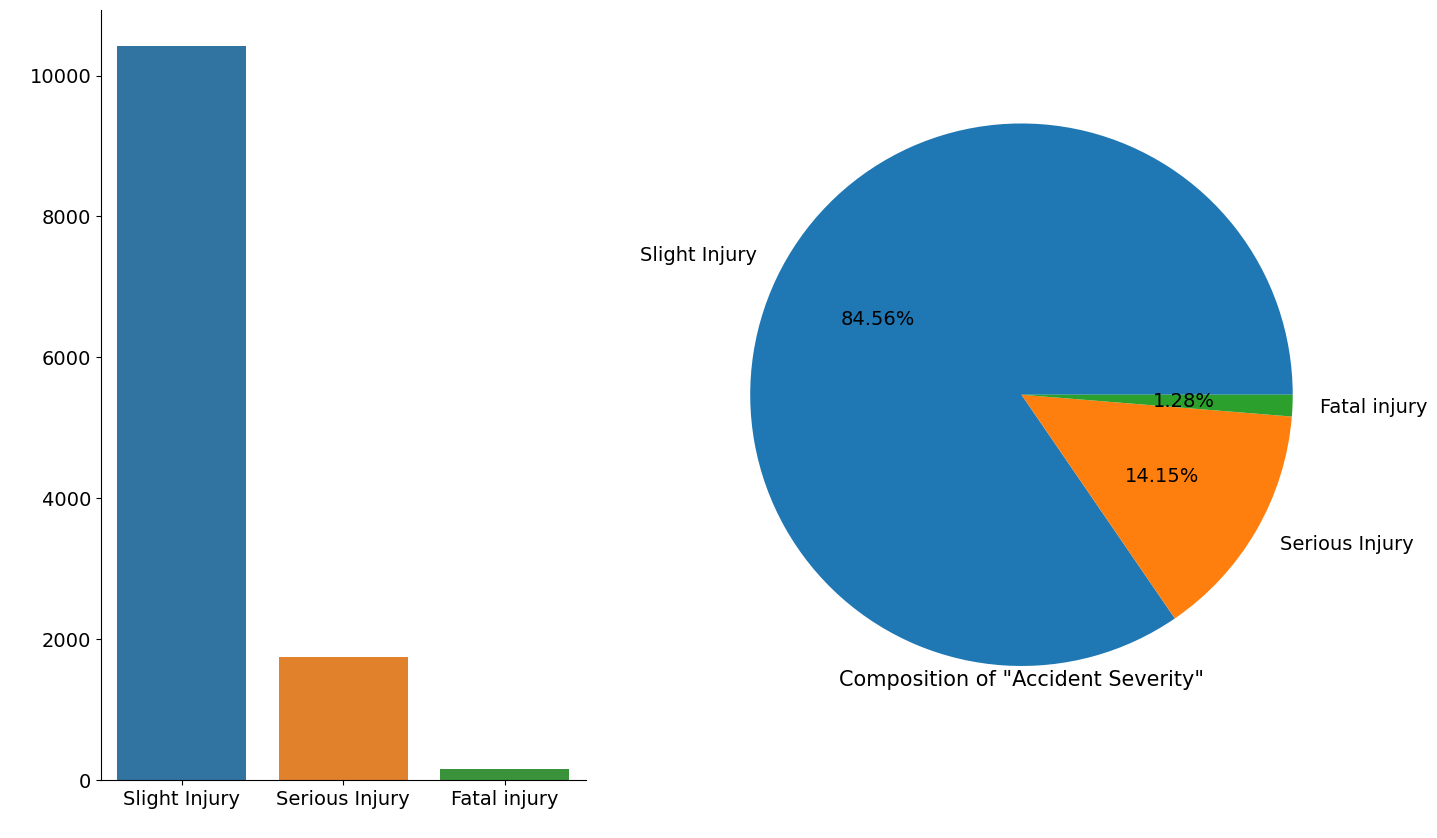

In [13]:
# Checking Target
# barplot
plt.figure(figsize=(15,10))
ax1=plt.subplot(1,2,1)
count_plot=sns.countplot(x=df['accident_severity'])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pie plot
ax2=plt.subplot(1,2,2)
pi=plt.pie(df['accident_severity'].value_counts(),
            labels=list(df['accident_severity'].unique()),
            autopct='%1.2f%%',
            radius=1.4,
            textprops={'fontsize':14}
           )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

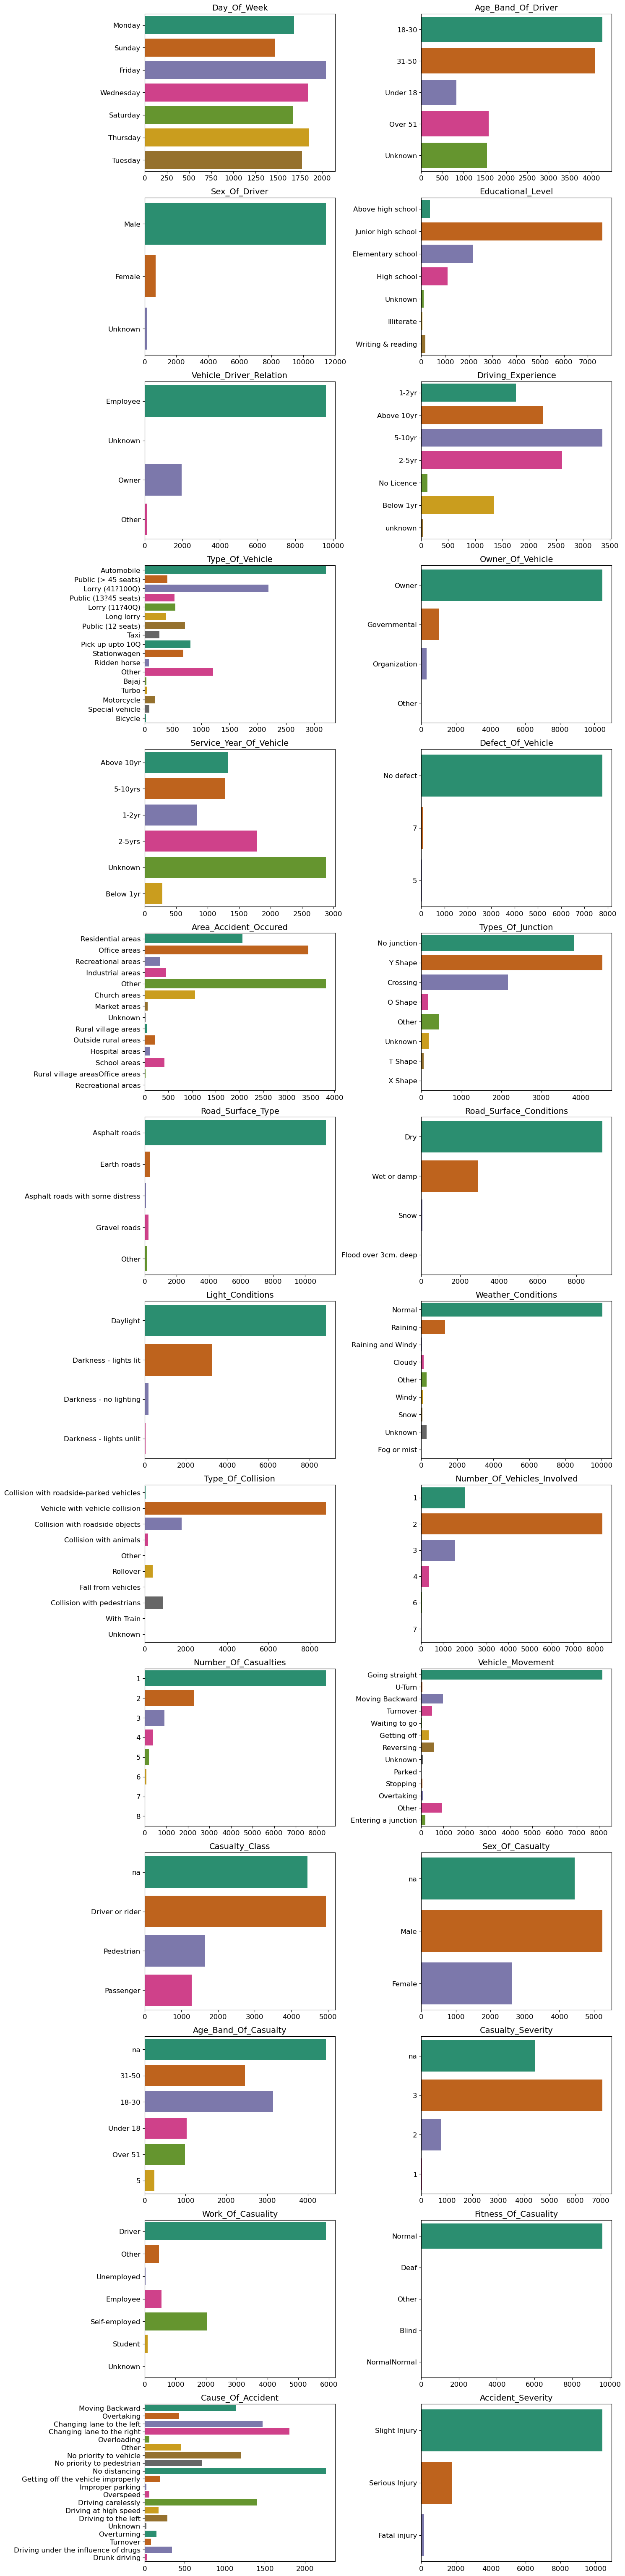

In [14]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'lanes_or_medians', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.
    
</div>

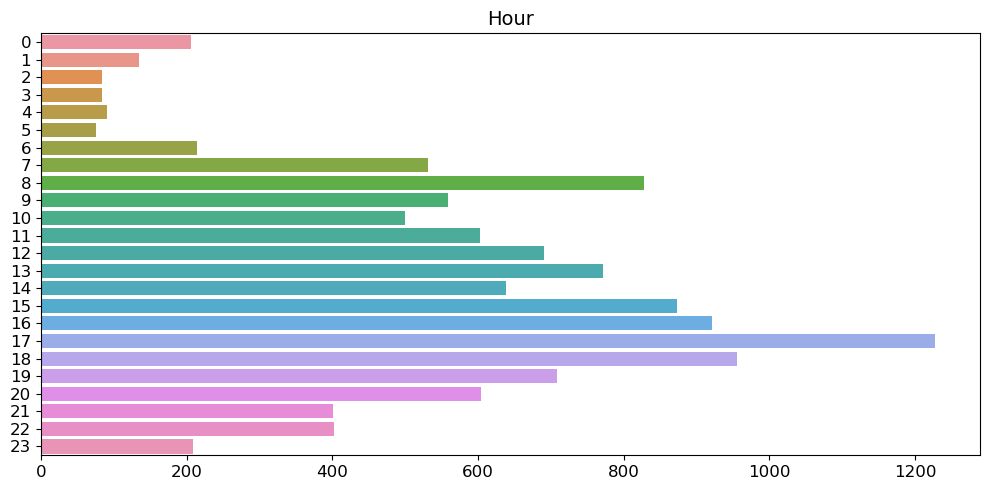

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Acer\AppData\Local\Temp\ipykernel_840\3292040429.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


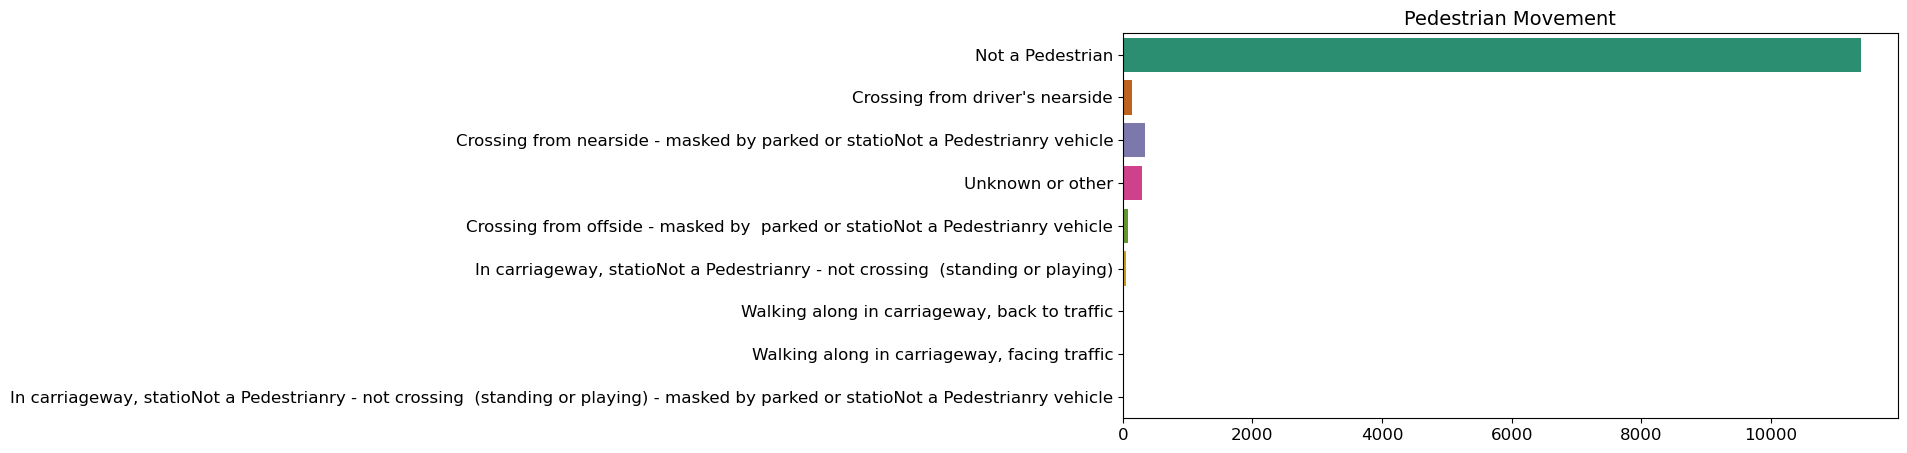

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

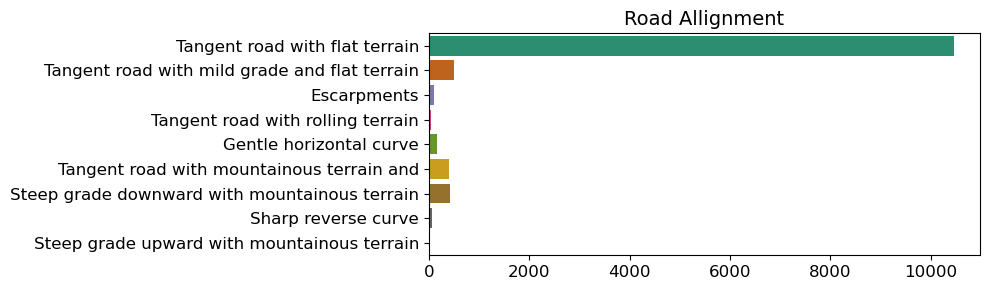

In [17]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

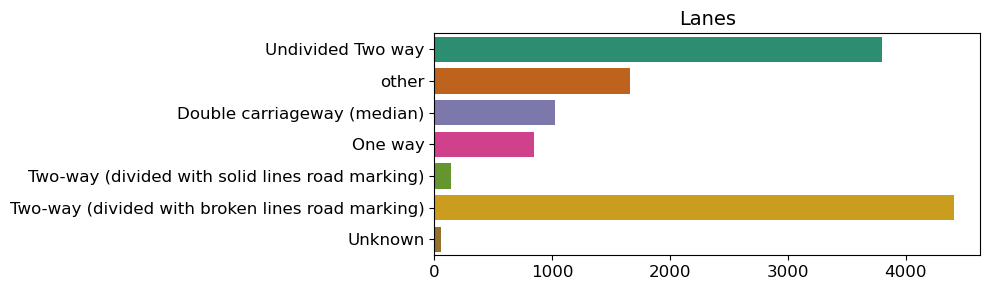

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes_or_medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

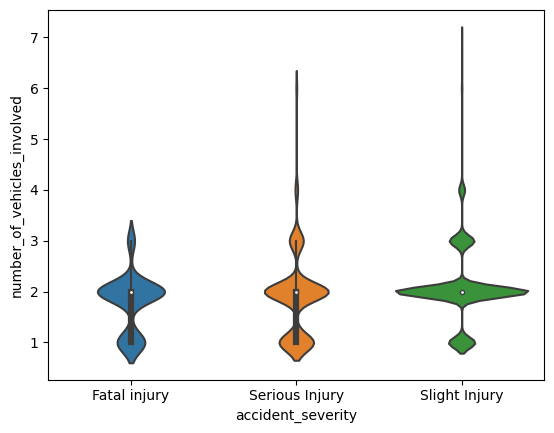

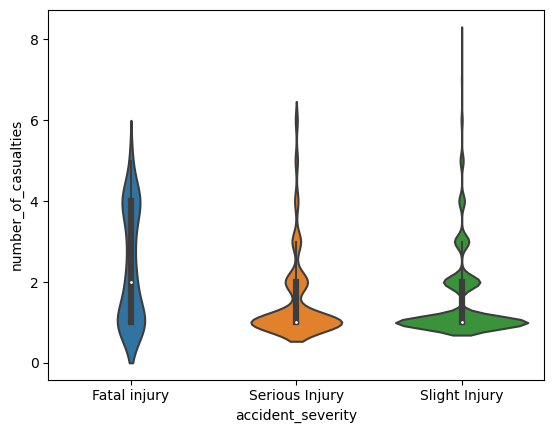

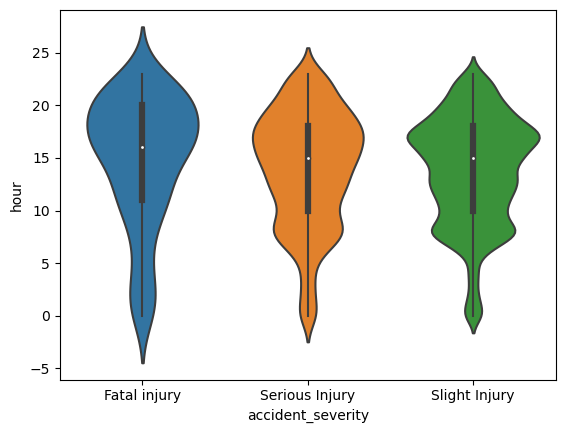

In [19]:
for col in df.describe().columns:
    sns.violinplot(x=df['accident_severity'].astype('category'),y=col,data=df)
    plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

In [20]:
hypothesis_df = df.copy(deep=True)

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 1: Which of the both Gender is dengorious driver?</font></h2><br>
<font color='#0080FF'>We would not consider normal weatherCalculating the conditional probability; Probability of an Accedent happen when the driver is female and reapeating calculations when it is male.
P(Gender = Male | Severity = 2) P(Gender = Female | Severity = 2)</font>

In [21]:
hypothesis_df.columns

Index(['day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour'],
      dtype='object')

In [22]:
((hypothesis_df.groupby(['sex_of_driver']).size()/hypothesis_df['sex_of_driver'].count())*100).add_prefix('Accedent(by %) caused by ')

sex_of_driver
Accedent(by %) caused by Female      5.691783
Accedent(by %) caused by Male       92.862943
Accedent(by %) caused by Unknown     1.445274
dtype: float64

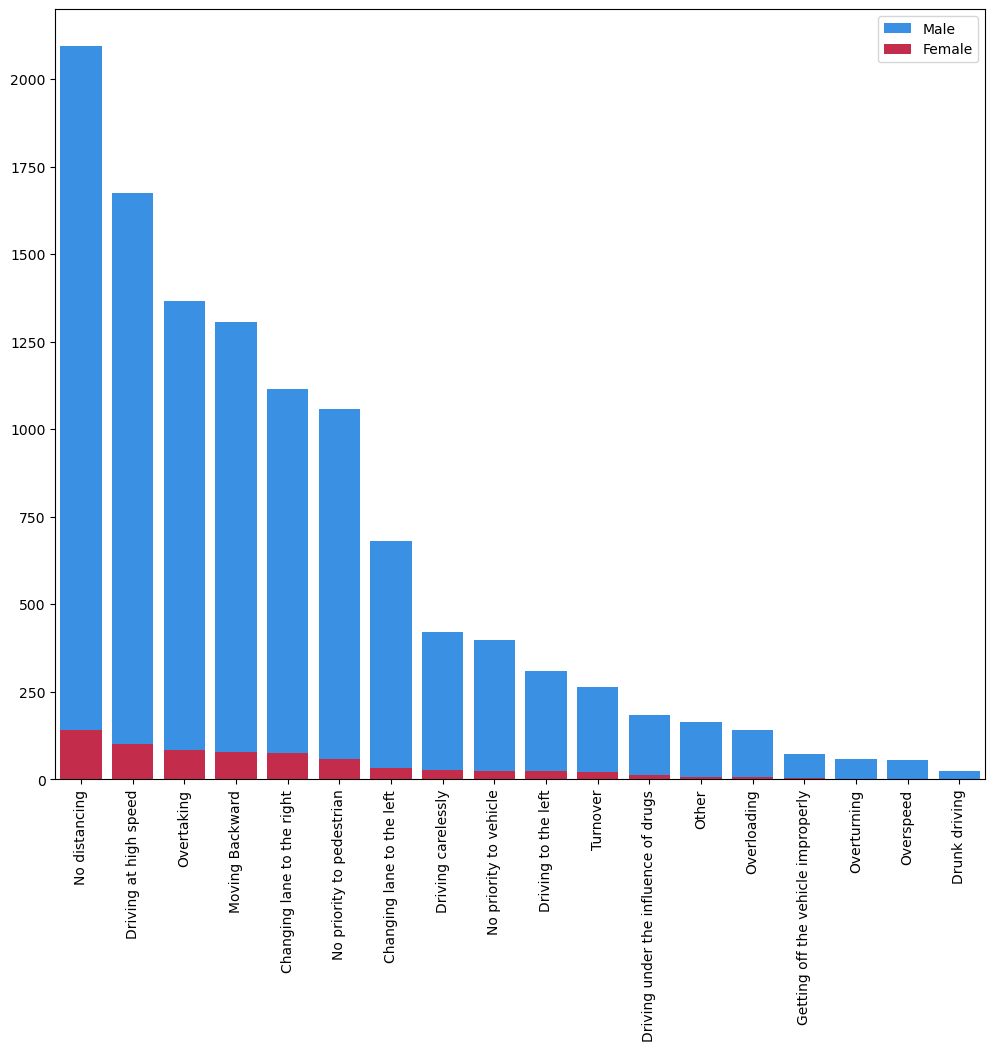

In [23]:
plt.figure(figsize=(12,10))
male_df=hypothesis_df.loc[hypothesis_df['sex_of_driver']=='Male']
female_df=hypothesis_df.loc[hypothesis_df['sex_of_driver']=='Female']
sns.barplot(data=male_df,x=male_df['cause_of_accident'].unique(),y=male_df['cause_of_accident'].value_counts().values,color='dodgerblue',label='Male')
sns.barplot(data=female_df,x=female_df['cause_of_accident'].unique(),y=female_df['cause_of_accident'].value_counts().values,color='crimson',label='Female')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [24]:
mf=pd.crosstab(index=hypothesis_df['sex_of_driver'].loc[hypothesis_df['sex_of_driver']!='Unknown'],columns=hypothesis_df['accident_severity'],margins=True)
mf

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
sex_of_driver,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


In [74]:
print(f"P(Gender=Female | Accedent Severity=Fatal Injury) = {round((mf.iloc[0,0]/mf.iloc[0,3]*1.0)*100,2)} %")
print(f"P(Gender=Male | Accedent Severity=Fatal Injury) = {round((mf.iloc[1,0]/mf.iloc[1,3]*1.0)*100,2)} %")
print()
print(f"P(Gender=Female | Accedent Severity=Serious Injury) = {round((mf.iloc[0,1]/mf.iloc[0,3]*1.0)*100,2)} %")
print(f"P(Gender=Male | Accedent Severity=Serious Injury) = {round((mf.iloc[1,1]/mf.iloc[1,3]*1.0)*100,2)} %")
print()
print(f"P(Gender=Female | Accedent Severity=Slight Injury) = {round((mf.iloc[0,2]/mf.iloc[0,3]*1.0)*100,2)} %")
print(f"P(Gender=Male | Accedent Severity=Slight Injury) = {round((mf.iloc[1,2]/mf.iloc[1,3]*1.0)*100,2)} %")

P(Gender=Female | Accedent Severity=Fatal Injury) = 0.71 %
P(Gender=Male | Accedent Severity=Fatal Injury) = 1.33 %

P(Gender=Female | Accedent Severity=Serious Injury) = 14.84 %
P(Gender=Male | Accedent Severity=Serious Injury) = 14.17 %

P(Gender=Female | Accedent Severity=Slight Injury) = 84.45 %
P(Gender=Male | Accedent Severity=Slight Injury) = 84.5 %


Although, the percentage of Accidents done in this sample by males is over 92% but, it doesn't actually indicate that males are more dangerous
If we calculated the probability for each gender we can deduce that both are quite the same.

In [76]:
ff=pd.crosstab(index=hypothesis_df['cause_of_accident'],columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
cause_of_accident,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 2: Is Speeding is the main Cause for Car Crashes?</font></h2></div>

In [77]:
print(f"Injuries(all type due to speeding) = {round((ff.iloc[2,3]+ff.iloc[3,3])/(ff.iloc[20,3]*1.0)*100,2)} %")

Injuries(all type due to speeding) = 12.8 %


Despite the fact that speeding causes accidents. After analysis it’s found that speeding is not one of the main factors.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 3: Does weakend account more accedent?</font></h2></div>

In [28]:
ff=pd.crosstab(index=hypothesis_df['day_of_week'],columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
day_of_week,,,,
Friday,16,313,1712,2041
Monday,12,204,1465,1681
Saturday,37,245,1384,1666
Sunday,35,190,1242,1467
Thursday,22,272,1557,1851
Tuesday,17,257,1496,1770
Wednesday,19,262,1559,1840
All,158,1743,10415,12316


In [29]:
print(f"Avarage percentage in any day = {(ff.iloc[7,3]/7)/ff.iloc[7,3]*100} %")
print(f"Accedent percentage in weekdays = {round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,3]*100,2)} %")
print(f"Accedent percentage in weekends = {round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,3]*100,2)} %")

Avarage percentage in any day = 14.285714285714285 %
Accedent percentage in weekdays = 74.56 %
Accedent percentage in weekends = 25.44 %


Its quite clear that there is no indication of more accidents happening on weekends

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 4: Are there more dangerous injuries at night than in day?</font></h2>
We would consider both fatal and serious to be dangerous injuries</div>

In [30]:
ff=pd.crosstab(index=hypothesis_df['light_conditions'],columns=hypothesis_df['accident_severity'],margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
light_conditions,,,,
Darkness - lights lit,66,465,2755,3286
Darkness - lights unlit,0,7,33,40
Darkness - no lighting,5,49,138,192
Daylight,87,1222,7489,8798
All,158,1743,10415,12316


In [31]:
sofa=0
for i in range(2):
    for j in range(4):
        sofa+=ff.iloc[j,i]
fin=sofa/(sum([ff.iloc[i,3] for i in range(4)]))
print(f"Dangerous injuries at night : {round(fin*100,2)} %")
slin = sum([ff.iloc[i,2] for i in range(4)])/sum([ff.iloc[i,3] for i in range(4)])
print(f"Slight injuries at night : {round(slin*100,2)} %")

Dangerous injuries at night : 15.44 %
Slight injuries at night : 84.56 %


In [32]:
print(f"Dangerous injuries at day : {round((sum([ff.iloc[3,i] for i in range(2)])/ff.iloc[3,3])*100,2)} %")
print(f"Slight injuries at day : {round((ff.iloc[3,2]/ff.iloc[3,3])*100,2)} %")

Dangerous injuries at day : 14.88 %
Slight injuries at day : 85.12 %


Although it does that in daylight there are more number of accidents but the dangerous injuries percentage are almost same either be it day or night.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 5: More accidents under some specific non-normal weather?</font></h2>
We would not consider normal weather</div>

In [34]:
ff=pd.crosstab(index=hypothesis_df['weather_conditions'],columns=hypothesis_df['accident_severity'],margins=True)
ff.drop(['Normal','All'],axis=0)

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
weather_conditions,,,,
Cloudy,0,8,117,125
Fog or mist,0,1,9,10
Other,0,28,268,296
Raining,23,158,1150,1331
Raining and Windy,0,2,38,40
Snow,0,5,56,61
Unknown,0,51,241,292
Windy,0,16,82,98


Without any analysis we can clearly see that rainy weather causes more accident and also all the fatal injuries have occured under non-normal conditions are there in rainy weather

In [35]:
#/////////////////////

# <span style="font-family:cursive;text-align:center">⚙ Preprocessing</span>

In [36]:
# df['time_dn']=df['hour'].astype('int').apply(lambda x: 'day' if (x>=6 and x<18) else 'night')

In [9]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Manualy encoding Ordinal Features

In [9]:
df['driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: driving_experience, dtype: int64

In [10]:
dExp={'unknown':0,'No Licence':1,'Below 1yr':2,'1-2yr':3,'2-5yr':4,'5-10yr':5,'Above 10yr':6}
df['driving_experience_new']=df['driving_experience'].map(dExp)

In [11]:
df['service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: service_year_of_vehicle, dtype: int64

In [12]:
vService={'Unknown':0,'Below 1yr':1,'1-2yr':2,'2-5yrs':3,'5-10yrs':4,'Above 10yr':5}
df['service_year_of_vehicle_new']=df['service_year_of_vehicle'].map(vService)

In [13]:
df['accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

In [14]:
aSeverity={'Slight Injury':0,'Serious Injury':1,'Fatal injury':2}
df['accident_severity']=df['accident_severity'].map(aSeverity)

In [15]:
df['age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: age_band_of_driver, dtype: int64

In [16]:
aDriver={'Unknown':0,'Under 18':1,'18-30':2,'31-50':3,'Over 51':4}
df['age_band_of_driver_new']=df['age_band_of_driver'].map(aDriver)

In [17]:
df=df.drop(['service_year_of_vehicle','driving_experience','age_band_of_driver'],axis=1)
df.head()

,day_of_week,sex_of_driver,educational_level,vehicle_driver_relation,type_of_vehicle,owner_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,driving_experience_new,service_year_of_vehicle_new,age_band_of_driver_new
0,Monday,Male,Above high school,Employee,Automobile,Owner,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0,17,3.0,5.0,2
1,Monday,Male,Junior high school,Employee,Public (> 45 seats),Owner,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,17,6.0,4.0,3
2,Monday,Male,Junior high school,Employee,Lorry (41?100Q),Owner,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17,3.0,NaN,2
3,Sunday,Male,Junior high school,Employee,Public (> 45 seats),Governmental,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,1,5.0,NaN,2
4,Sunday,Male,Junior high school,Employee,NaN,Owner,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,1,4.0,4.0,2


In [18]:
df['age_band_of_casualty'].isna().sum()

0

In [19]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() >= 10:
        print(col)

type_of_vehicle
area_accident_occured
type_of_collision
vehicle_movement
cause_of_accident


In [19]:
df.vehicle_movement.value_counts()

Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: vehicle_movement, dtype: int64

#### Frequency encoding

In [22]:
tov=df.groupby('type_of_vehicle').size()/len(df)
aao=df.groupby('area_accident_occured').size()/len(df)
toc=df.groupby('type_of_collision').size()/len(df)
coc=df.groupby('cause_of_accident').size()/len(df)
vm=df.groupby('vehicle_movement').size()/len(df)

In [23]:
# display(tov,aao,toc,coc,vm)

In [24]:
df.loc[:,'type_of_vehicle']=df['type_of_vehicle'].map(tov)
df.loc[:,'area_accident_occured']=df['area_accident_occured'].map(aao)
df.loc[:,'type_of_collision']=df['type_of_collision'].map(toc)
df.loc[:,'cause_of_accident']=df['cause_of_accident'].map(coc)
df.loc[:,'vehicle_movement']=df['vehicle_movement'].map(vm)

In [25]:
df['casualty_severity'].value_counts()

3     7076
na    4443
2      771
1       26
Name: casualty_severity, dtype: int64

In [34]:
df.head()

,day_of_week,sex_of_driver,educational_level,vehicle_driver_relation,type_of_vehicle,owner_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,driving_experience_new,service_year_of_vehicle_new,age_band_of_driver_new,hour
0,Monday,Male,Above high school,Employee,0.260231,Owner,No defect,0.167262,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,0.004385,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,0.092319,0,3.0,5.0,2,17
1,Monday,Male,Junior high school,Employee,0.032803,Owner,No defect,0.280205,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,0.712407,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,0.034914,0,6.0,4.0,3,17
2,Monday,Male,Junior high school,Employee,0.177493,Owner,No defect,0.026551,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,0.145015,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,0.119601,1,3.0,NaN,2,17
3,Sunday,Male,Junior high school,Employee,0.032803,Governmental,No defect,0.280205,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,0.712407,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,0.146801,0,5.0,NaN,2,1
4,Sunday,Male,Junior high school,Employee,NaN,Owner,No defect,0.037025,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,0.712407,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,0.034914,0,4.0,4.0,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   day_of_week                  12316 non-null  object 
 1   age_band_of_driver           12316 non-null  object 
 2   sex_of_driver                12316 non-null  object 
 3   educational_level            11575 non-null  object 
 4   vehicle_driver_relation      11737 non-null  object 
 5   type_of_vehicle              11366 non-null  float64
 6   owner_of_vehicle             11834 non-null  object 
 7   defect_of_vehicle            7889 non-null   object 
 8   area_accident_occured        12077 non-null  float64
 9   lanes_or_medians             11931 non-null  object 
 10  road_allignment              12174 non-null  object 
 11  types_of_junction            11429 non-null  object 
 12  road_surface_type            12144 non-null  object 
 13  road_surface_con

In [27]:
df.head()

,day_of_week,sex_of_driver,educational_level,vehicle_driver_relation,type_of_vehicle,owner_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,driving_experience_new,service_year_of_vehicle_new,age_band_of_driver_new
0,Monday,Male,Above high school,Employee,0.260231,Owner,No defect,0.167262,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,0.004385,2,2,0.66239,na,na,na,na,Driver,Normal,Not a Pedestrian,0.092319,0,17,3.0,5.0,2
1,Monday,Male,Junior high school,Employee,0.032803,Owner,No defect,0.280205,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,0.712407,2,2,0.66239,na,na,na,na,Driver,Normal,Not a Pedestrian,0.034914,0,17,6.0,4.0,3
2,Monday,Male,Junior high school,Employee,0.177493,Owner,No defect,0.026551,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,0.145015,2,2,0.66239,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,0.119601,1,17,3.0,0.0,2
3,Sunday,Male,Junior high school,Employee,0.032803,Governmental,No defect,0.280205,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,0.712407,2,2,0.66239,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,0.146801,0,1,5.0,0.0,2
4,Sunday,Male,Junior high school,Employee,0.260231,Owner,No defect,0.037025,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,0.712407,2,2,0.66239,na,na,na,na,Driver,Normal,Not a Pedestrian,0.034914,0,1,4.0,4.0,2


In [28]:
df_encode=df.copy()
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

cols=['accident_severity','type_of_vehicle','area_accident_occured',
      'type_of_collision','cause_of_accident','vehicle_movement']
df_encode = ordinal_encoder(df_encode, df_encode.drop(cols, axis=1).columns)
df_encode.shape

(12316, 32)

In [29]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

<AxesSubplot:>

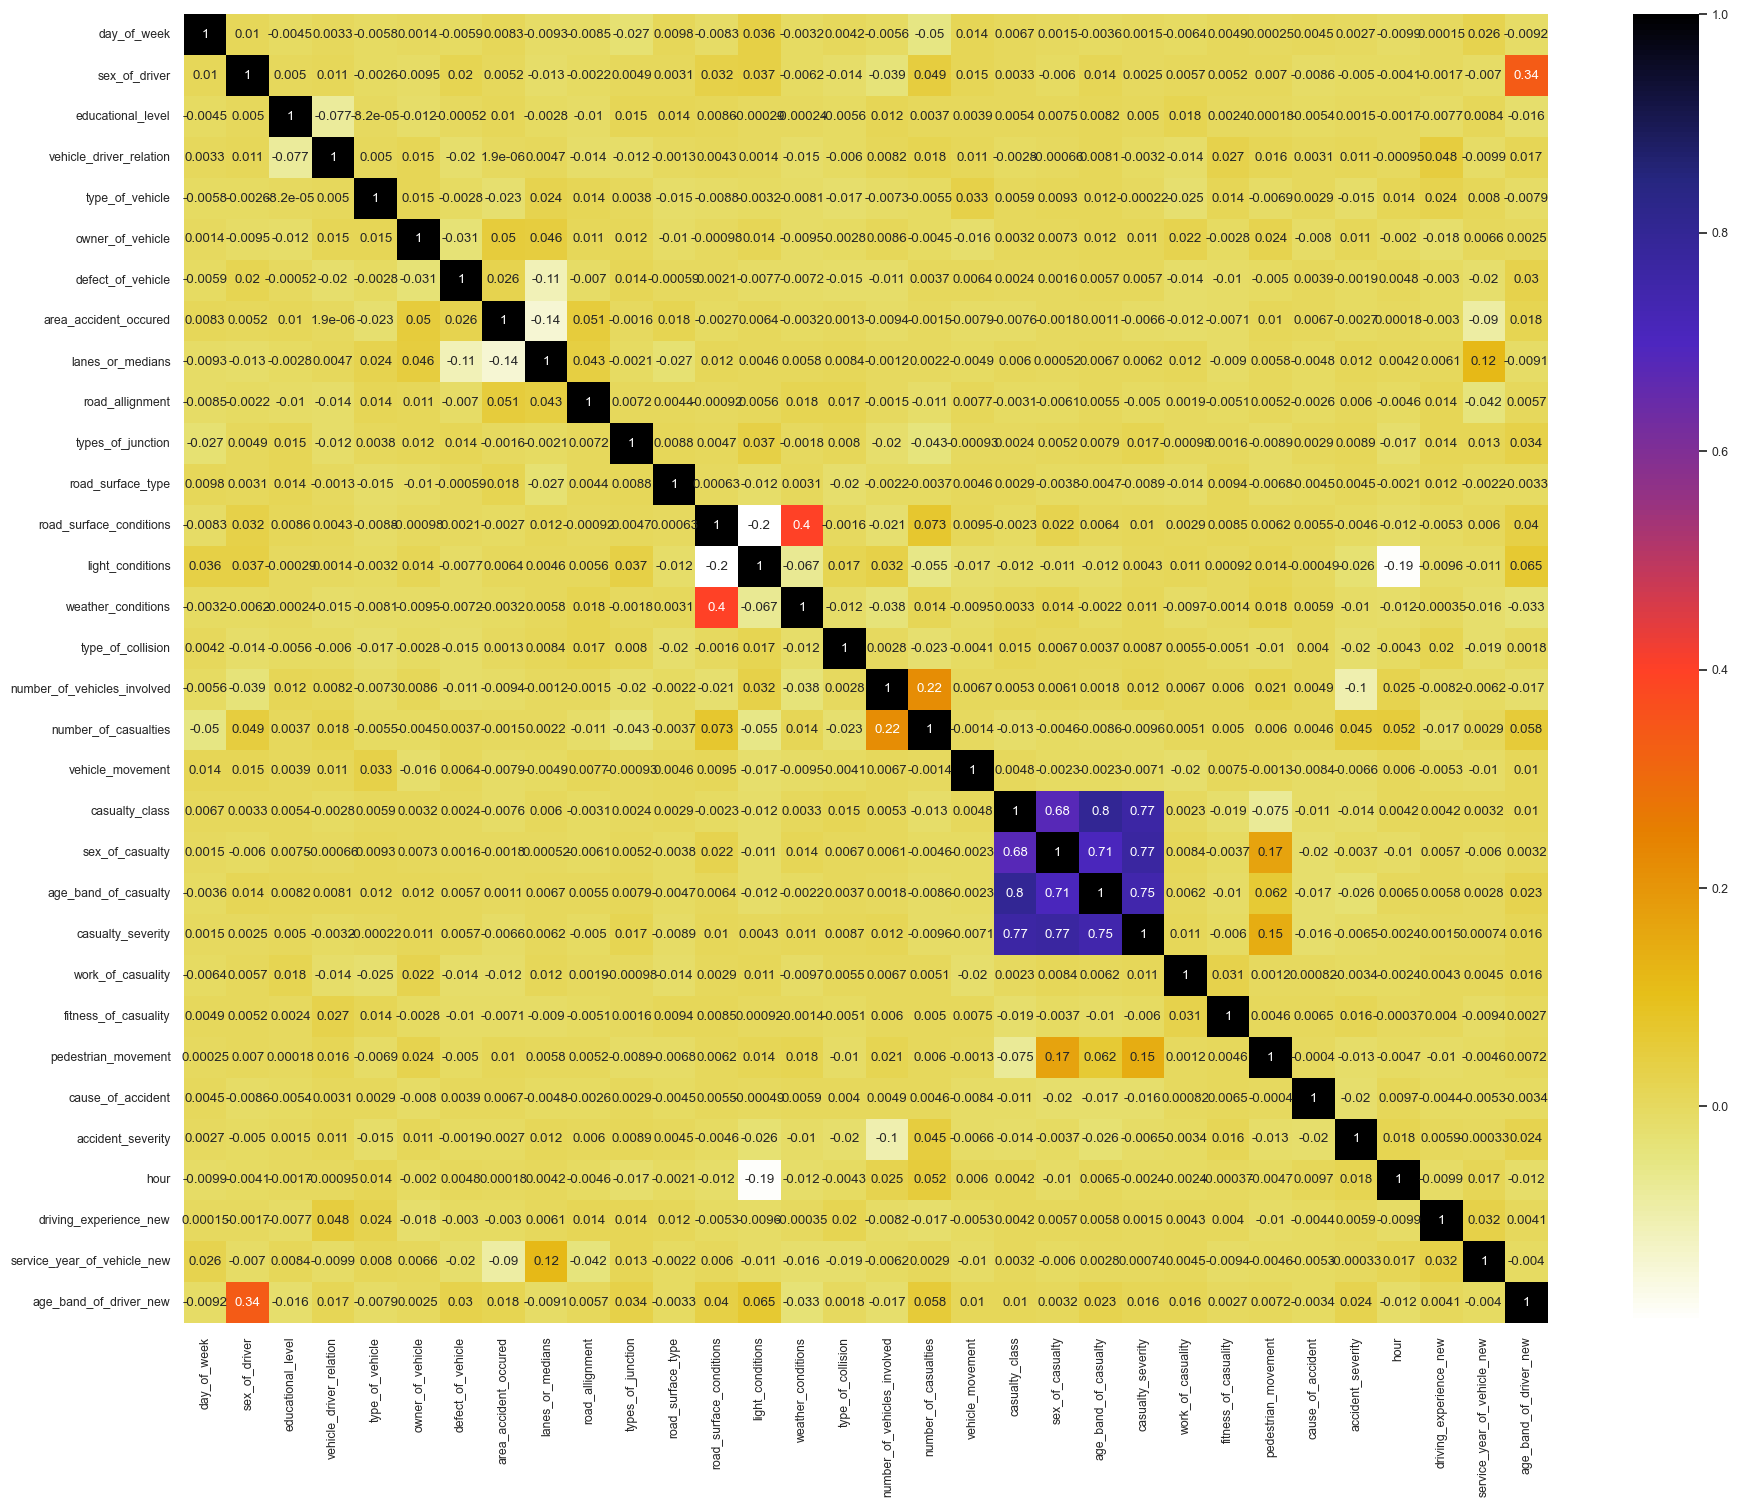

In [30]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df_encode.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [31]:
# df['type_of_collision'].unique()

In [32]:
pca=PCA(n_components=1)
df_pca=df_encode[['casualty_class','sex_of_casualty','age_band_of_casualty','casualty_severity']]
df_pca=pca.fit_transform(df_pca.values)
df_pca=pd.DataFrame(df_pca,columns=['casulity_class'])

In [27]:
# def min_max(df):
#     mx=int(df.max())
#     mn=int(df.min())
#     if mn<0:
#         mn=-(mn)
#     print(mn,mx)
#     df=df.apply(lambda k: ((mx-mn)/(mx+mn))*k)
#     return df
# min_max(df_pca)

In [33]:
df_encode=pd.concat([df_encode,df_pca],axis=1)
df_encode.head()

,day_of_week,sex_of_driver,educational_level,vehicle_driver_relation,type_of_vehicle,owner_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,driving_experience_new,service_year_of_vehicle_new,age_band_of_driver_new,casulity_class
0,1,1,0,0,0.260231,3,2,0.167262,2,5,1,0,0,3,2,0.004385,1,1,0.66239,3,2,5,3,0,2,5,0.092319,0,17,3,5,2,-3.032977
1,1,1,4,0,0.032803,3,2,0.280205,4,5,1,0,0,3,2,0.712407,1,1,0.66239,3,2,5,3,0,2,5,0.034914,0,17,6,4,3,-3.032977
2,1,1,4,0,0.177493,3,2,0.026551,6,5,1,0,0,3,2,0.145015,1,1,0.66239,0,1,1,2,0,2,5,0.119601,1,17,3,0,2,2.122589
3,3,1,4,0,0.032803,0,2,0.280205,6,6,7,2,0,0,2,0.712407,1,1,0.66239,2,0,0,2,0,2,5,0.146801,0,1,5,0,2,2.232594
4,3,1,4,0,0.260231,3,2,0.037025,6,5,7,0,0,0,2,0.712407,1,1,0.66239,3,2,5,3,0,2,5,0.034914,0,1,4,4,2,-3.032977


In [34]:
df_encode.drop(['casualty_class','sex_of_casualty','age_band_of_casualty','casualty_severity'],axis=1,inplace=True)

In [35]:
df_encode.head()

,day_of_week,sex_of_driver,educational_level,vehicle_driver_relation,type_of_vehicle,owner_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,driving_experience_new,service_year_of_vehicle_new,age_band_of_driver_new,casulity_class
0,1,1,0,0,0.260231,3,2,0.167262,2,5,1,0,0,3,2,0.004385,1,1,0.66239,0,2,5,0.092319,0,17,3,5,2,-3.032977
1,1,1,4,0,0.032803,3,2,0.280205,4,5,1,0,0,3,2,0.712407,1,1,0.66239,0,2,5,0.034914,0,17,6,4,3,-3.032977
2,1,1,4,0,0.177493,3,2,0.026551,6,5,1,0,0,3,2,0.145015,1,1,0.66239,0,2,5,0.119601,1,17,3,0,2,2.122589
3,3,1,4,0,0.032803,0,2,0.280205,6,6,7,2,0,0,2,0.712407,1,1,0.66239,0,2,5,0.146801,0,1,5,0,2,2.232594
4,3,1,4,0,0.260231,3,2,0.037025,6,5,7,0,0,0,2,0.712407,1,1,0.66239,0,2,5,0.034914,0,1,4,4,2,-3.032977


In [36]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(df_encode.drop('accident_severity',axis=1),df_encode['accident_severity'])

<AxesSubplot:xlabel='accident_severity', ylabel='count'>

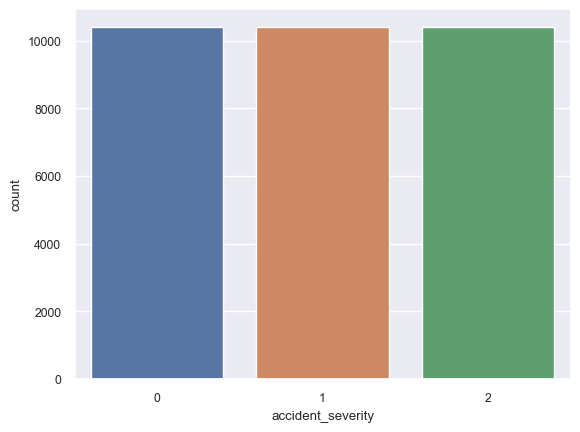

In [37]:
sns.countplot(y_smt)

# <span style="font-family:cursive;text-align:center">🔎 Model Selecting</span>

In [38]:
xTrain,xTest,yTrain,yTest=train_test_split(X_smt,y_smt,test_size=0.2,random_state=42)

In [34]:
# fs=SelectKBest(score_func=chi2,k='all')
# fs.fit(xTrain,yTrain)
# xTrainTrans=fs.transform(xTrain)
# xTrainTrans=pd.DataFrame(xTrainTrans)
# print(xTrainTrans.shape,xTrain.shape)

In [39]:
model=ExtraTreesClassifier()
model.fit(xTrain,yTrain)
pred=model.predict(xTest)

In [40]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2069
           1       0.96      0.91      0.93      2100
           2       1.00      1.00      1.00      2073

    accuracy                           0.96      6242
   macro avg       0.96      0.96      0.96      6242
weighted avg       0.96      0.96      0.96      6242



In [41]:
confusion_matrix(yTest,pred)

array([[1978,   90,    1],
       [ 179, 1920,    1],
       [   1,    0, 2072]], dtype=int64)

In [43]:
models=[LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),
        GradientBoostingClassifier(),ExtraTreesClassifier()]

In [46]:
# models=[RandomForestClassifier(),GaussianNB(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier()]

def modelTrain(xTrain,yTrain,xTest,yTest,model):
    for i in range(len(model)):
        model[i].fit(xTrain,yTrain)
        pred=model[i].predict(xTest)
        cm=confusion_matrix(yTest,pred)
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        print(f'Model : {model[i]} ====> Accuracy : {recall}')
        
modelTrain(xTrain,yTrain,xTest,yTest,models)

Model : LogisticRegression() ---- Accuracy : [0.56162397 0.4952381  0.58031838]
Model : RandomForestClassifier() ---- Accuracy : [0.96471725 0.86333333 0.99421129]
Model : AdaBoostClassifier() ---- Accuracy : [0.85790237 0.54761905 0.66521949]
Model : GradientBoostingClassifier() ---- Accuracy : [0.98018366 0.70285714 0.87264834]
Model : ExtraTreesClassifier() ---- Accuracy : [0.9637506  0.90952381 0.99903521]


In [ ]:
# modelTrain(xTrain,yTrain,xTest,yTest,models)

In [ ]:
# xTrain.info()

# <span style="font-family:cursive;text-align:center">🛠 Hyperparameter Tuning</span>

### Using RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42,
                               n_jobs=-1
                              )
# Fit the random search model
rf_random.fit(xTrain, yTrain)

In [ ]:
model1=rf_random.best_estimator_

In [39]:
# model1=RandomForestClassifier()
rf_tuned_model_optuna=ExtraTreesClassifier(max_depth=19, max_features=0.16664053943137946,
                     min_samples_split=3, n_estimators=199)
rf_tuned_model_optuna.fit(xTrain,yTrain)
pred=rf_tuned_model_optuna.predict(xTest)

In [40]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2088
           1       0.92      0.91      0.92      2044
           2       0.99      1.00      1.00      2113

    accuracy                           0.94      6245
   macro avg       0.94      0.94      0.94      6245
weighted avg       0.94      0.94      0.94      6245



In [38]:
import joblib

In [41]:
with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P1\\tune_model.pkl','wb') as f:
    joblib.dump(rf_tuned_model_optuna,f)

### Using Optuna

In [35]:
import optuna

In [ ]:
# RANDOM_SEED=42
# kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [39]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def extra_tree_objective(trial, data=xTrain, target=yTrain):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = ExtraTreesClassifier(**param,n_jobs=-1)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [42]:
def tuner(objective, n=5, direction='maximize'): 
    # Create Study object
    study = optuna.create_study(direction="maximize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [44]:
%%time
et_param, et_score = tuner(extra_tree_objective,40)
et_tuned_model_optuna = ExtraTreesClassifier(**param,n_jobs=-1)

[I 2023-05-08 14:35:03,216] A new study created in memory with name: no-name-270a420e-ba1d-4cd7-8826-dbb24ffd7085
[I 2023-05-08 14:35:29,264] Trial 0 finished with value: -0.3465430587095989 and parameters: {'n_estimators': 249, 'max_depth': 14, 'min_samples_split': 8, 'max_features': 0.7121639578493332}. Best is trial 0 with value: -0.3465430587095989.
[I 2023-05-08 14:35:43,462] Trial 1 finished with value: -0.2869151789272125 and parameters: {'n_estimators': 430, 'max_depth': 20, 'min_samples_split': 9, 'max_features': 0.06675203403513244}. Best is trial 1 with value: -0.2869151789272125.
[I 2023-05-08 14:35:59,483] Trial 2 finished with value: -0.2687044615050594 and parameters: {'n_estimators': 442, 'max_depth': 20, 'min_samples_split': 5, 'max_features': 0.0688585892544363}. Best is trial 2 with value: -0.2687044615050594.
[I 2023-05-08 14:36:15,098] Trial 3 finished with value: -0.2968207871342473 and parameters: {'n_estimators': 176, 'max_depth': 16, 'min_samples_split': 3, 'ma

Best score: -0.25205069445434686
Optimized parameters: {'n_estimators': 199, 'max_depth': 19, 'min_samples_split': 3, 'max_features': 0.16664053943137946}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
Wall time: 11min 14s


In [47]:
et_tuned_model_optuna=ExtraTreesClassifier(max_depth=19, max_features=0.16664053943137946,
                     min_samples_split=3, n_estimators=199)

ExtraTreesClassifier(max_depth=19, max_features=0.16664053943137946,
                     min_samples_split=3, n_estimators=199)

### Using Hyper-Opt

In [ ]:
import hyperopt
hyperopt.__version__

In [ ]:
# space={'criterion':hp.choice('criterion',['entropy','gini']),
#        'max_depth':hp.quniform('max_depth',10,110,10),
#        'max_features':hp.choice('max_features',['auto','sqrt','log2',None]),
#        'min_samples_leaf':hp.quniform('min_samples_leaf',0,0.5,0.1),
#        'min_samples_split':hp.quniform('min_samples_split',0,1,0.1),
#        'n_estimators':hp.choice('n_estimators',[10,50,300,750,1200])
#        }

space={'criterion':hp.choice('criterion',['entropy','gini']),
       'max_depth':hp.choice('max_depth',list(np.arange(10,110,10,dtype=int))),
       'max_features':hp.choice('max_features',['auto','sqrt','log2',None]),
       'min_samples_leaf':hp.choice('min_samples_leaf',[2,8,20,40]),
       'min_samples_split':hp.choice('min_samples_split',[10,20,40,60,80]),
       'n_estimators':hp.choice('n_estimators',[10,50,300,750,1200])
       }

In [ ]:
def objective(space):
    model=RandomForestClassifier(criterion=space['criterion'],
                               max_depth=space['max_depth'],
                               max_features=space['max_features'],
                               min_samples_leaf=space['min_samples_leaf'],
                               min_samples_split=space['min_samples_split'],
                               n_estimators=space['n_estimators'],
                            )
    acc=cross_val_score(model,xTrain,yTrain,cv=5).mean()
    return {'loss':-acc,'status':STATUS_OK}

In [ ]:
%%time
trials=Trials()
best=fmin(fn=objective,
          space=space,
          algo=tpe.suggest,
          max_evals=10,
          trials=trials,
    
)
best

# <span style="font-family:cursive;text-align:center">Explanable AI</span>

In [38]:
import shap

In [49]:
size = 1000

sample_exists = False

if sample_exists:
    sample_set = pd.read_csv('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P1\\shap_values_sample1000.pkl')
else:
    sample_set = xTest.sample(size)

In [44]:
is_saved = False

if is_saved:
    with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P1\\shap_values_sample1000.pkl', 'rb') as f:
        shap_values = joblib.load(f)
    with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P1\\shap_explaner.pkl', 'rb') as f:
        shap_explaner = joblib.load(f)
else:
    #shape explainer for some error debug
    shap_explaner=shap.Explainer(model)(xTest)
    #calculating shap values
    shap_value = shap.Explainer(model).shap_values(xTest)

In [39]:
shap.initjs()

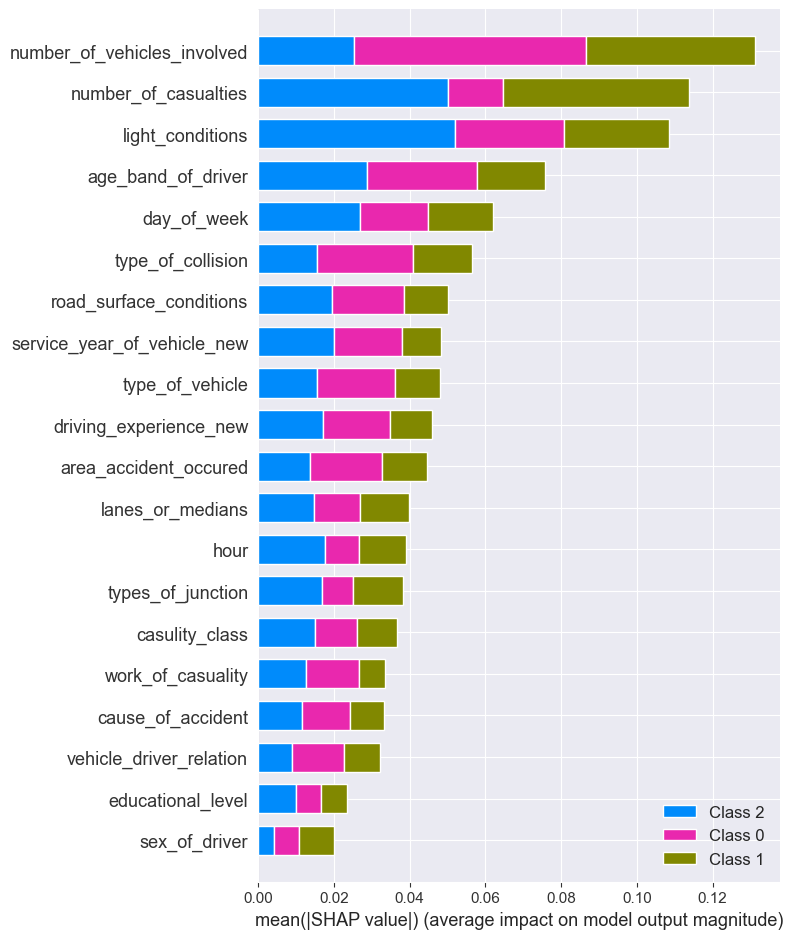

In [56]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

In [ ]:
# sv = shap.TreeExplainer(rf_tuned_model_optuna)(sample_set)

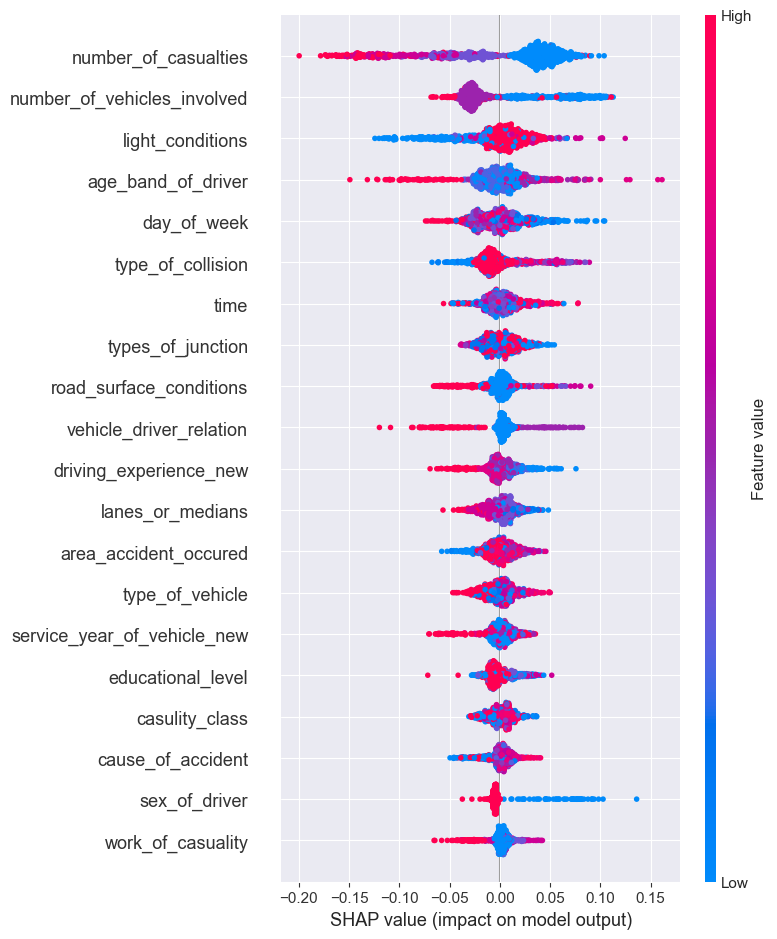

In [91]:
shap.summary_plot(sv.values[:,:,1], sample_set)

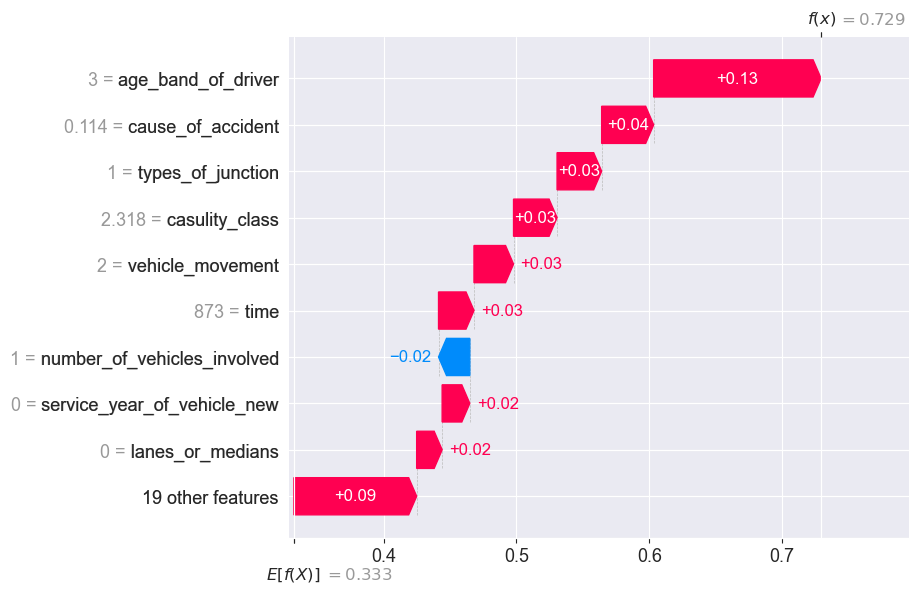

In [47]:
# sv = shap.TreeExplainer(rf_tuned_model_optuna)(sample_set)
exp = shap.Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=xTest.values, 
                  feature_names=xTest.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [78]:
expected_value=shap.TreeExplainer(rf_tuned_model_optuna).expected_value
shap_values=sv.values[:,:,1]
features_display=sample_set

In [85]:
sv.values[:,:,1]

array([[ 0.02667978,  0.01258542,  0.12598942, ...,  0.00253251,
         0.0208148 ,  0.03275919],
       [-0.00805549, -0.02546576, -0.01068805, ..., -0.0020642 ,
        -0.00550759, -0.00347135],
       [ 0.05124676,  0.00624587,  0.00839074, ..., -0.03203973,
         0.01936035,  0.01154364],
       ...,
       [-0.0029226 , -0.00847471,  0.00192849, ...,  0.00589237,
        -0.00872888, -0.01703198],
       [-0.04145631, -0.03029052, -0.01658706, ..., -0.009533  ,
        -0.01050644, -0.00837638],
       [-0.00156649, -0.00430568, -0.00536016, ...,  0.00674218,
        -0.00804254, -0.00488832]])

In [88]:
shap.force_plot(shap.TreeExplainer(model).expected_value[0],
                sv.values[0][:], 
                sample_set[:10])

IndexError: index 10 is out of bounds for axis 0 with size 10

In [79]:
shap.decision_plot(expected_value, shap_values, features_display)

ValueError: operands could not be broadcast together with shapes (3,) (1000,21) 

In [ ]:
# model1=RandomForestClassifier(criterion='entropy',max_depth=50,max_features='sqrt',min_samples_leaf=0.1,min_samples_split=0.2,n_estimators=1200)

In [ ]:
# # model=RandomForestClassifier()
# model1.fit(xTrain,yTrain)
# pred=model1.predict(xTest)

In [ ]:
# print(classification_report(yTest,pred))